In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import os
import time
from dataloader import preprocess_data, construct_datasets

In [20]:
train_data = preprocess_data(pd.read_csv(r'..\dat\walks\random_walk_600min.csv'))
val_data = preprocess_data(pd.read_csv(r'..\dat\walks\random_walk_300min.csv'))
test_data = preprocess_data(pd.read_csv(r'..\dat\walks\random_walk_180min.csv'))
columns_input = ['finestep_norm', 'step_diff', 'step_60rsum_exp', 'step_300rsum_exp', 'c_mean_lag10', 'c_mean_10rmean']

X_train, y_train, X_val, y_val, X_test, y_test = construct_datasets(train_data, val_data, test_data, columns_input, 'c_mean_norm')
X_train.head()

,finestep_norm,step_diff,step_60rsum_exp,step_300rsum_exp,c_mean_lag10,c_mean_10rmean
600,0.502838,0.625000,0.538928,0.436671,0.456522,0.458696
601,0.503967,0.630952,0.541043,0.438384,0.457609,0.458478
602,0.505157,0.638889,0.543365,0.440162,0.457609,0.458696
603,0.506409,0.646825,0.545662,0.441987,0.460870,0.458261
604,0.507690,0.650794,0.547975,0.443800,0.457609,0.458370


In [21]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Initialize and train the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
# save the model to disk
#import pickle
#filename = '../exp/final/linreg_model.sav'
#pickle.dump(lin_model, open(filename, 'wb'))

# Predict on the testing data
y_pred = lin_model.predict(X_val)

# Calculate the mean squared error of the model
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)

Mean Squared Error:  9.208904296640349e-06
Mean Absolute Error:  0.0023913188577588274


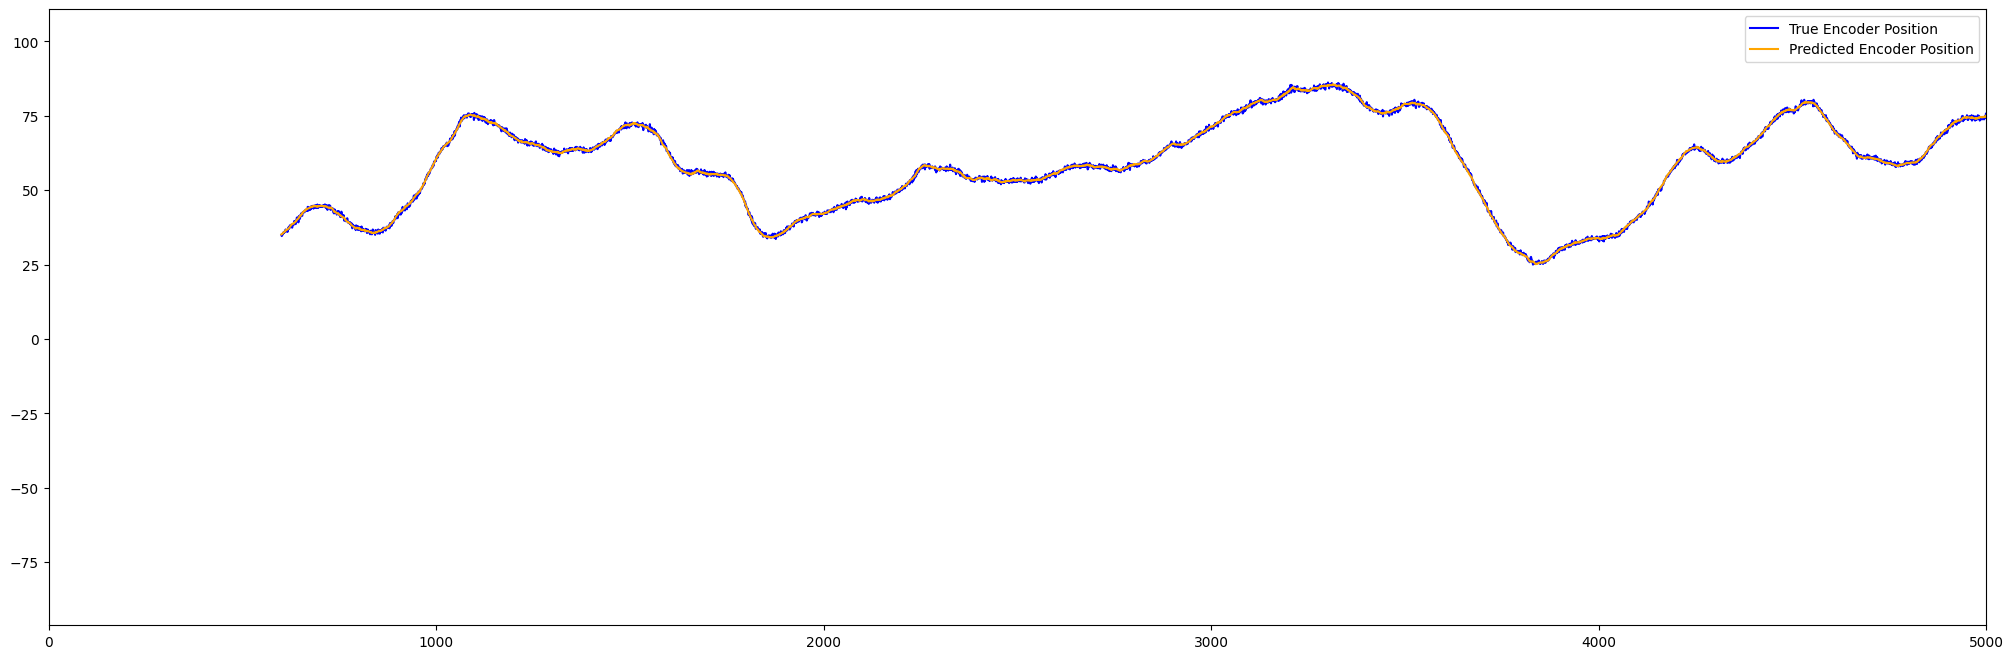

In [22]:
# Plot the predicted values against the true values
y_pred_unnorm = y_pred * (val_data['c_mean'].max() - val_data['c_mean'].min()) + val_data['c_mean'].min()
fig, ax = plt.subplots(figsize=(25, 8))
ax.plot(val_data['c_mean'], label='True Encoder Position', color='blue')
ax.plot(val_data.index, y_pred_unnorm, label='Predicted Encoder Position', color='orange')
ax.set_xlim(0, 5000)
#ax.set_ylim(50, 100)
plt.legend()
plt.show()

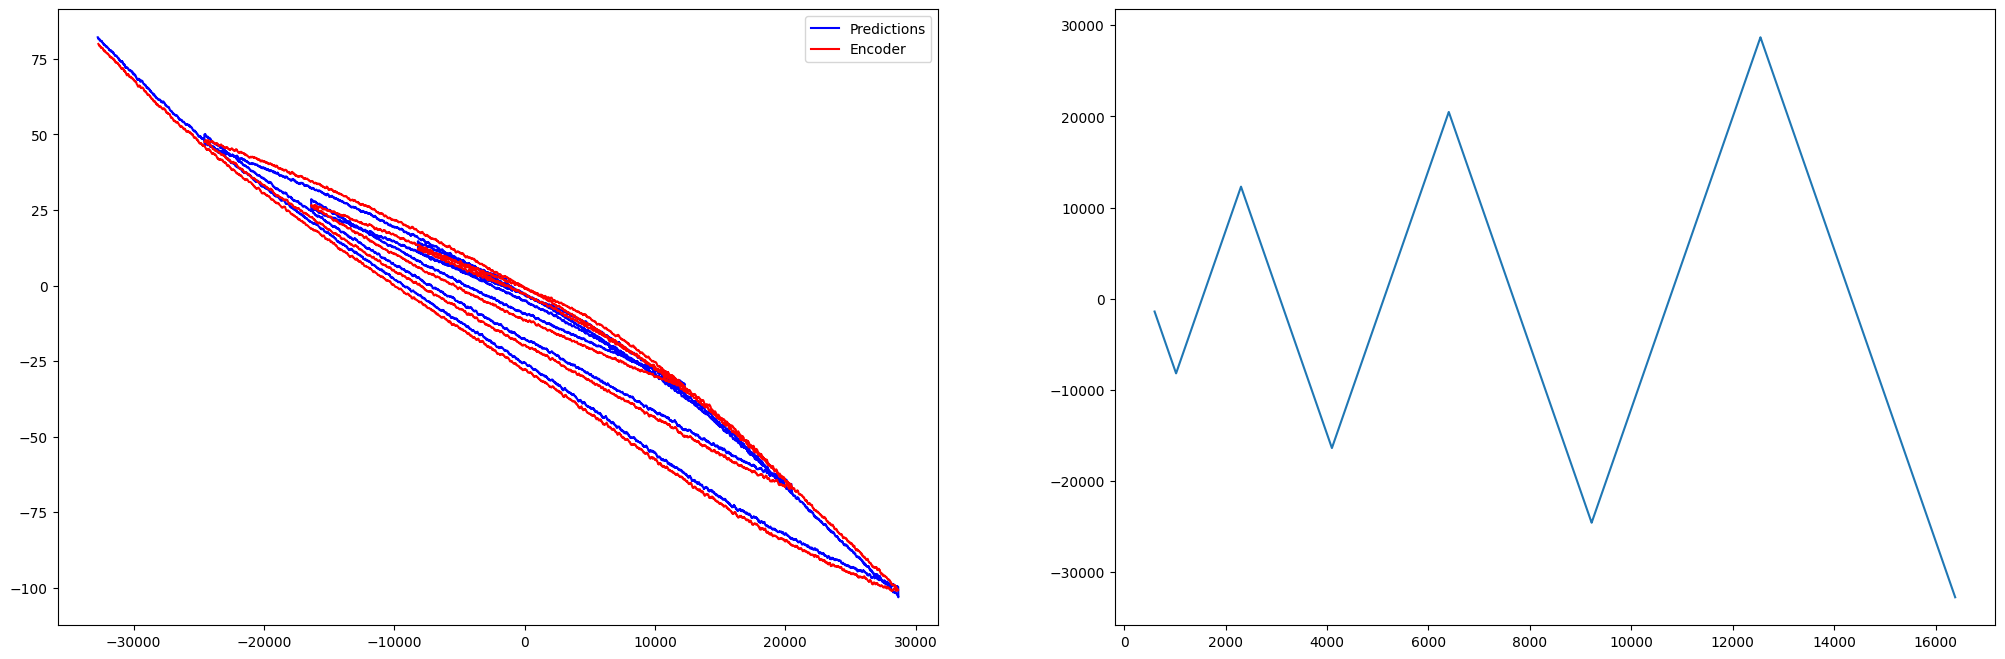

In [32]:
df = pd.read_csv(r'..\dat\hysteresis\hysteresis_display.csv', index_col=0)
test_df = preprocess_data(df).dropna()
test_df.head()

outputs = lin_model.predict(test_df[columns_input])

fig, ax = plt.subplots(1, 2, figsize=(25, 8))
outputs_unnorm = np.array(outputs) * (df['counter'].max() - df['counter'].min()) + df['counter'].min()
#ax[0].plot(test_df['finestep'], -test_df['c_mean'].rolling(8, center=True).mean())
ax[0].plot(test_df.dropna()['finestep'], outputs_unnorm, label='Predictions', color='blue')
ax[0].plot(test_df['finestep'], test_df['counter'].rolling(8, center=True).mean(), color='red', label='Encoder')
ax[0].legend()
# mark the start and end of the walk
#ax[0].plot(test_df['finestep'].iloc[0], -test_df['c_mean'].iloc[0], 'ro')
#ax[0].plot(test_df['finestep'].iloc[-1], -test_df['c_mean'].iloc[-1], 'ro')
#ax[0].set_xlim(-np.power(2, 15), np.power(2, 15))
#ax[0].set_ylim(max(outputs), min(outputs) - 0.2)

ax[1].plot(test_df['finestep'])
#ax[1].set_ylim(-np.power(2, 15), np.power(2, 15))

plt.show()